# **TikTok Project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 5 End-of-course project: Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Build a regression model**

<img src="https://drive.google.com/uc?id=1j4eZRrDDC_ayowY7oj2ymsRMphdE4Tuf" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="https://drive.google.com/uc?id=1xQC3f1RCcZxyVUbZ71T-e4HyRIJFF94C" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [1]:
# Import packages for data manipulation
### YOUR CODE HERE ###
import pandas as pd
import numpy as np

# Import packages for data visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
### YOUR CODE HERE ###
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Import packages for data modeling
### YOUR CODE HERE ###
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.utils import resample


Load the TikTok dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset into dataframe
file_path = '/content/drive/My Drive/Advanced Data Analytics Certificate/Activity Datasets/tiktok_dataset.csv'
data = pd.read_csv(file_path)

<img src="https://drive.google.com/uc?id=1kpRJdR0z6z3foENI0hyMdZ9duLvXZ8Ca" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a logistic regression model?


1. Outliers and extreme data values can significantly impact linear regression equations. After visualizing data, make a plan for addressing outliers by dropping rows, substituting extreme data with average data, and/or removing data values greater than 3 standard deviations.
2. EDA activities also include identifying missing data to help the analyst make decisions on their exclusion or inclusion by substituting values with data set means, medians, and other similar methods.
3. It's important to check for things like multicollinearity between predictor variables, as well to understand their distributions, as this will help you decide what statistical inferences can be made from the model and which ones cannot.
4. Additionally, it can be useful to engineer new features. For example, in this dataset you can create a new variable by extracting the length of String values from the `video_transcription_text` variable.

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [4]:
# Display first few rows
### YOUR CODE HERE ###
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [5]:
# Get number of rows and columns
### YOUR CODE HERE ###
data.shape

(19382, 12)

Get the data types of the columns.

In [6]:
# Get data types of columns
### YOUR CODE HERE ###
data.dtypes

,0
#,int64
claim_status,object
video_id,int64
video_duration_sec,int64
video_transcription_text,object
verified_status,object
author_ban_status,object
video_view_count,float64
video_like_count,float64
video_share_count,float64


Get basic information about the dataset.

In [7]:
# Get basic information
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [8]:
# Generate basic descriptive stats
### YOUR CODE HERE ###
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [11]:
# prompt: randomly select 25% of rows in data and call it data_test. The remaining unselected rows will called data_train.

data_train, data_test = train_test_split(data, test_size=0.25, random_state=0)


In [12]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14536 entries, 6629 to 2732
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         14536 non-null  int64  
 1   claim_status              14319 non-null  object 
 2   video_id                  14536 non-null  int64  
 3   video_duration_sec        14536 non-null  int64  
 4   video_transcription_text  14319 non-null  object 
 5   verified_status           14536 non-null  object 
 6   author_ban_status         14536 non-null  object 
 7   video_view_count          14319 non-null  float64
 8   video_like_count          14319 non-null  float64
 9   video_share_count         14319 non-null  float64
 10  video_download_count      14319 non-null  float64
 11  video_comment_count       14319 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.4+ MB


In [13]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4846 entries, 17817 to 2502
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         4846 non-null   int64  
 1   claim_status              4765 non-null   object 
 2   video_id                  4846 non-null   int64  
 3   video_duration_sec        4846 non-null   int64  
 4   video_transcription_text  4765 non-null   object 
 5   verified_status           4846 non-null   object 
 6   author_ban_status         4846 non-null   object 
 7   video_view_count          4765 non-null   float64
 8   video_like_count          4765 non-null   float64
 9   video_share_count         4765 non-null   float64
 10  video_download_count      4765 non-null   float64
 11  video_comment_count       4765 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 492.2+ KB


In [14]:
# prompt: Verify that the number of rows in data equals to the sum of numbers of rows in data_train and data_test

# Verify that the number of rows in data equals to the sum of numbers of rows in data_train and data_test
len(data) == len(data_train) + len(data_test)


True

In [16]:
# prompt: Compute the percentage of the number of rows in data_test in the number of rows in data

print(len(data_test)/len(data) * 100)


25.002579713135898


In [27]:
# Check for missing values
### YOUR CODE HERE ###
data_train.isna().sum()

,0
#,0
claim_status,217
video_id,0
video_duration_sec,0
video_transcription_text,217
verified_status,0
author_ban_status,0
video_view_count,217
video_like_count,217
video_share_count,217


In [31]:
# EXTRA
data_train['claim_status'].value_counts(normalize=True)

,proportion
claim_status,
claim,0.504435
opinion,0.495565


In [32]:
# Drop rows with missing values
### YOUR CODE HERE ###
data_train = data_train.dropna(axis=0)

In [34]:
# Display first few rows after handling missing values
### YOUR CODE HERE ###
data_train.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
6629,6630,claim,5827297713,20,a colleague learned from the media a claim th...,not verified,active,726128.0,99642.0,19477.0,1844.0,70.0
12303,12304,opinion,3604389227,53,my hypothesis is that baby octopuses are the s...,not verified,active,1130.0,389.0,145.0,5.0,2.0
1927,1928,claim,3400704837,9,a friend learned in a discussion board that d...,not verified,active,407317.0,33937.0,12291.0,64.0,23.0
13070,13071,opinion,9867115563,17,our position is that windshield wipers were in...,not verified,active,5395.0,174.0,11.0,3.0,0.0
5931,5932,claim,3098472800,19,a colleague learned online that human eyeball...,not verified,active,29745.0,13557.0,4443.0,325.0,70.0


In [35]:
# prompt: reset index of data_train

data_train = data_train.reset_index(drop=True)


In [36]:
# prompt: show head

data_train.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,6630,claim,5827297713,20,a colleague learned from the media a claim th...,not verified,active,726128.0,99642.0,19477.0,1844.0,70.0
1,12304,opinion,3604389227,53,my hypothesis is that baby octopuses are the s...,not verified,active,1130.0,389.0,145.0,5.0,2.0
2,1928,claim,3400704837,9,a friend learned in a discussion board that d...,not verified,active,407317.0,33937.0,12291.0,64.0,23.0
3,13071,opinion,9867115563,17,our position is that windshield wipers were in...,not verified,active,5395.0,174.0,11.0,3.0,0.0
4,5932,claim,3098472800,19,a colleague learned online that human eyeball...,not verified,active,29745.0,13557.0,4443.0,325.0,70.0


In [38]:
# EXTRA
data_train['claim_status'].value_counts(normalize=True)

,proportion
claim_status,
claim,0.504435
opinion,0.495565


Check for and handle duplicates.

In [39]:
# Check for duplicates
### YOUR CODE HERE ###
data_train.duplicated().sum()

0

Check for and handle outliers.

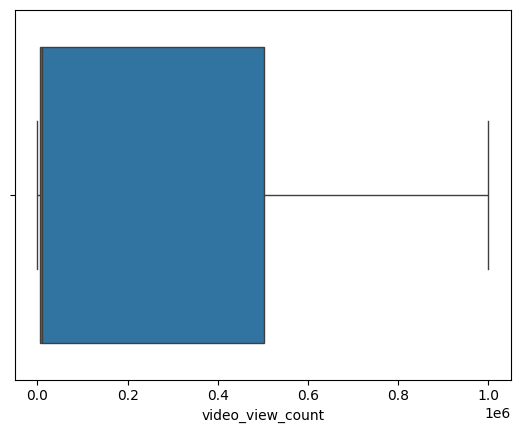

In [42]:
# Create a boxplot to visualize distribution of `video_view_count`
### YOUR CODE HERE ###
sns.boxplot(x=data_train['video_view_count'])
plt.show()

In [43]:
# prompt: perform describe to data_train

data_train.describe()


,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,14319.000000,1.431900e+04,14319.000000,14319.000000,14319.000000,14319.000000,14319.000000,14319.000000
mean,9515.146449,5.616996e+09,32.431664,254700.634751,84335.687129,16734.447936,1041.541448,349.406034
std,5507.651248,2.538643e+09,16.198635,322782.964103,133273.078759,31995.917059,1984.914285,799.860247
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4740.500000,3.414097e+09,18.000000,4931.000000,826.000000,116.000000,7.000000,1.000000
50%,9521.000000,5.620098e+09,32.000000,9981.000000,3397.000000,728.000000,46.000000,10.000000
75%,14277.500000,7.822865e+09,46.000000,502345.000000,124922.000000,18287.500000,1162.500000,291.000000
max,19084.000000,9.999873e+09,60.000000,999817.000000,654588.000000,249672.000000,14994.000000,9599.000000


In [44]:
# Log transform the `video_view_count` column in the training data
data_train['video_view_count'] = np.log(data_train['video_view_count'])

# Display first few rows after handling outliers
data_train.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,6630,claim,5827297713,20,a colleague learned from the media a claim th...,not verified,active,13.495482,99642.0,19477.0,1844.0,70.0
1,12304,opinion,3604389227,53,my hypothesis is that baby octopuses are the s...,not verified,active,7.029973,389.0,145.0,5.0,2.0
2,1928,claim,3400704837,9,a friend learned in a discussion board that d...,not verified,active,12.917347,33937.0,12291.0,64.0,23.0
3,13071,opinion,9867115563,17,our position is that windshield wipers were in...,not verified,active,8.593228,174.0,11.0,3.0,0.0
4,5932,claim,3098472800,19,a colleague learned online that human eyeball...,not verified,active,10.300416,13557.0,4443.0,325.0,70.0


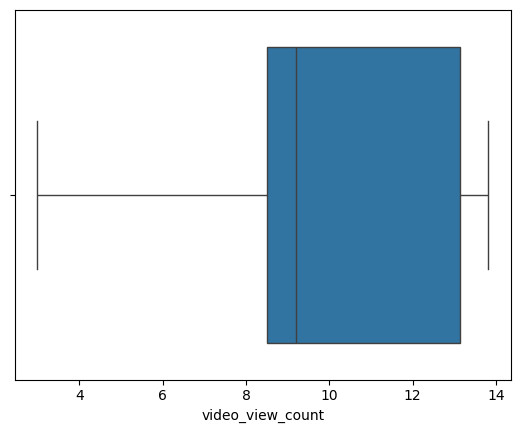

In [45]:
# prompt: plot a boxplot for column video_view_count

sns.boxplot(x=data_train['video_view_count'])
plt.show()


In [ ]:
# prompt: list all encoders in sklearn preprocessing

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder


In [193]:
# prompt: provide a tutorial for application of LabelEncoder in sklearn.preprocessing

from sklearn.preprocessing import LabelEncoder

# Sample data
data = ['cat', 'dog', 'bird', 'cat', 'dog']

In [194]:
# prompt: create a data_frame df with a column "animal" using data from "data"

df = pd.DataFrame({'animal': data})
display(df)
display(df.info())


,animal
0,cat
1,dog
2,bird
3,cat
4,dog


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   animal  5 non-null      object
dtypes: object(1)
memory usage: 168.0+ bytes


None

In [195]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [197]:
# Fit and transform the data
encoded_data = label_encoder.fit_transform(df['animal'])

# Print the encoded data
print("Encoded Data:", encoded_data)

Encoded Data: [1 2 0 1 2]


In [198]:
print(label_encoder.get_params())
print(label_encoder.classes_)

{}
['bird' 'cat' 'dog']


In [199]:
# Get the mapping between original and encoded labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nLabel Mapping:")
for original, encoded in label_mapping.items():
    print(f"{original} --> {encoded}")


Label Mapping:
bird --> 0
cat --> 1
dog --> 2


In [200]:
# Inverse transform to get original labels from encoded values
decoded_data = label_encoder.inverse_transform(encoded_data)
print("\nDecoded Data:", decoded_data)


Decoded Data: ['cat' 'dog' 'bird' 'cat' 'dog']


In [202]:
# prompt: create a data_frame df_test with one column "animal" having values: dog, cat, bird, cat, bear.

### Code:
data = ['dog', 'cat', 'bird', 'cat', 'bird']
df_test = pd.DataFrame({'animal': data})
display(df_test)


,animal
0,dog
1,cat
2,bird
3,cat
4,bird


In [204]:
# prompt: apply label_encoder to df_test['animal'] and store the result as a new column "animal_encoded" in df_test

# Apply label_encoder to df_test['animal']
encoded_data_test = label_encoder.transform(df_test['animal'])

# Store the result as a new column "animal_encoded" in df_test
df_test['animal_encoded'] = encoded_data_test

# Display the updated DataFrame
display(df_test)


,animal,animal_encoded
0,dog,2
1,cat,1
2,bird,0
3,cat,1
4,bird,0


In [174]:
# prompt: provide a tutorial for application of OrdinalEncoder in sklearn.preprocessing

# Import the OrdinalEncoder class
from sklearn.preprocessing import OrdinalEncoder

# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder(categories=[['cold', 'warm', 'hot']], handle_unknown='use_encoded_value', unknown_value=-1)


In [175]:
display(encoder.get_params())

{'categories': [['cold', 'warm', 'hot']],
 'dtype': numpy.float64,
 'encoded_missing_value': nan,
 'handle_unknown': 'use_encoded_value',
 'max_categories': None,
 'min_frequency': None,
 'unknown_value': -1}

In [176]:
# Sample data (replace with your actual data)
data = [['cold'], ['warm'], ['hot'], ['cold']]

In [177]:
# prompt: create a dataframe with one column "temperature" based on array "data"

# Create a DataFrame from the sample data
df = pd.DataFrame(data, columns=['temperature'])

# Display the DataFrame
print(df)
print(df.info())


  temperature
0        cold
1        warm
2         hot
3        cold
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   temperature  4 non-null      object
dtypes: object(1)
memory usage: 160.0+ bytes
None


In [178]:
# Fit the encoder to the 'temperature' column
encoder.fit(df[['temperature']])
display(encoder.categories_)
display(encoder.get_params())


[array(['cold', 'warm', 'hot'], dtype=object)]

{'categories': [['cold', 'warm', 'hot']],
 'dtype': numpy.float64,
 'encoded_missing_value': nan,
 'handle_unknown': 'use_encoded_value',
 'max_categories': None,
 'min_frequency': None,
 'unknown_value': -1}

In [179]:
# prompt: create another dataframe df_test with one column "temperature" with values: warm, cold, hot, very-hot

# Create another dataframe df_test with one column "temperature" with values: warm, cold, hot, very-hot
df_test = pd.DataFrame(['warm', 'cold', 'hot', 'very-hot'], columns=['temperature'])
print(df_test)


  temperature
0        warm
1        cold
2         hot
3    very-hot


In [180]:
# Transform the 'temperature' column using the fitted encoder
df_test['temperature_encoded'] = encoder.transform(df_test[['temperature']])

# Display the DataFrame with the encoded column
print(df_test)

  temperature  temperature_encoded
0        warm                  1.0
1        cold                  0.0
2         hot                  2.0
3    very-hot                 -1.0


In [181]:
# prompt: convert the column 'temperature_encoded' in df_test to a 2D array

# Convert the 'temperature_encoded' column to a 2D array
temperature_encoded_2d = df_test['temperature_encoded'].values.reshape(-1, 1)

# Print the 2D array
print(temperature_encoded_2d)


[[ 1.]
 [ 0.]
 [ 2.]
 [-1.]]


In [182]:
# prompt: apply inverse transform of encoder to the column "temperature_encoded" of df_test and store the result as a new column "inverse_temperature" in df_test

# Apply inverse transform to the 'temperature_encoded' column
inverse_test_2d = encoder.inverse_transform(temperature_encoded_2d)

# Display the DataFrame with the inverse transformed column
print(inverse_test_2d)


[['warm']
 ['cold']
 ['hot']
 [None]]


In [156]:
# To inverse transform the encoded data back to original:
inverse_test = encoder.inverse_transform(df_test['temperature_encoded'])
print(inverse_test)

ValueError: Expected 2D array, got 1D array instead:
array=[ 2.  0.  1. -1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [165]:
# prompt: provide a tutorial for application of OneHotEncoder in sklearn.preprocessing

# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Sample data
data = {'color': ['red', 'green', 'blue', 'red']}
df = pd.DataFrame(data)
display(df.info())
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   color   4 non-null      object
dtypes: object(1)
memory usage: 160.0+ bytes


None

,color
0,red
1,green
2,blue
3,red


In [166]:
# Create OneHotEncoder object
encoder_train = OneHotEncoder(handle_unknown='ignore')

In [167]:
# prompt: list all possible options for encoder's parameter drop

# Possible options for the `drop` parameter in OneHotEncoder:
print("Possible options for 'drop':")
print("- 'first': Drops the first category for each feature.")
print("- 'if_binary': Drops the first category for features with two categories.")
print("- None: Does not drop any categories.")


Possible options for 'drop':
- 'first': Drops the first category for each feature.
- 'if_binary': Drops the first category for features with two categories.
- None: Does not drop any categories.


In [168]:
# prompt: display encoder's settings

# Display encoder's settings
encoder_train.get_params()


{'categories': 'auto',
 'drop': None,
 'dtype': numpy.float64,
 'feature_name_combiner': 'concat',
 'handle_unknown': 'ignore',
 'max_categories': None,
 'min_frequency': None,
 'sparse': 'deprecated',
 'sparse_output': True}

In [169]:
# prompt: fit the encoder with column "color" in df

# Fit the encoder on the 'color' column
encoder_train.fit(df[['color']])
display(encoder_train.get_params())
display(encoder_train.categories_)

# Transform the data
#encoded_data = encoder.transform(df[['color']]).toarray()

# Get the feature names
#feature_names = encoder.get_feature_names_out(['color'])

# Create a new DataFrame with the encoded data
#df_encoded = pd.DataFrame(encoded_data, columns=feature_names)

# Display the encoded DataFrame
#display(df_encoded)


{'categories': 'auto',
 'drop': None,
 'dtype': numpy.float64,
 'feature_name_combiner': 'concat',
 'handle_unknown': 'ignore',
 'max_categories': None,
 'min_frequency': None,
 'sparse': 'deprecated',
 'sparse_output': True}

[array(['blue', 'green', 'red'], dtype=object)]

In [170]:
# prompt: create another dataframe df_test with one column "color" with values from set {red, blue, green, orange}

# Sample data for df_test
data_test = {'color': ['red', 'blue', 'green', 'orange']}
df_test = pd.DataFrame(data_test)

# Display df_test
display(df_test)


,color
0,red
1,blue
2,green
3,orange


In [171]:
color_encoded = encoder_train.transform(df_test[['color']]).toarray()

In [172]:
color_encoded

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [173]:
# prompt: apply inverse transform of encoder_train to color_encoded to get color_decoded

color_decoded = encoder_train.inverse_transform(color_encoded)
print(color_decoded)


[['red']
 ['blue']
 ['green']
 [None]]


In [99]:
# Get the feature names
feature_names = encoder_train.get_feature_names_out(['color'])
feature_names

array(['color_green', 'color_red'], dtype=object)

In [100]:
# Create a new DataFrame with the encoded data
df_test_encoded = pd.DataFrame(color_encoded, columns=feature_names)

# Display the encoded DataFrame
display(df_test_encoded)

,color_green,color_red
0,0.0,1.0
1,0.0,0.0
2,1.0,0.0
3,0.0,0.0


In [ ]:
# Fit and transform the categorical feature
encoded_data = encoder.fit_transform(df[['color']])

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['color']))

# Concatenate the encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1)

print(df_encoded)

### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [ ]:
# Code a correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###
corr = data_upsampled.corr(numeric_only=True)
corr

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.581483,-0.504015,-0.487096,-0.413799,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.006507,0.010515,0.008753,0.013983,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004890,0.002206,0.003989,-0.004586,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.832832,0.711313,0.690048,0.583485,0.244693
video_like_count,-0.581483,0.006507,0.004890,0.832832,1.000000,0.850053,0.828082,0.706140,0.202386
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.850053,1.000000,0.710117,0.620182,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.828082,0.710117,1.000000,0.857679,0.173396
video_comment_count,-0.413799,0.013983,-0.004586,0.583485,0.706140,0.620182,0.857679,1.000000,0.149750
text_length,-0.193677,-0.007083,-0.002981,0.244693,0.202386,0.171651,0.173396,0.149750,1.000000


Visualize a correlation heatmap of the data.

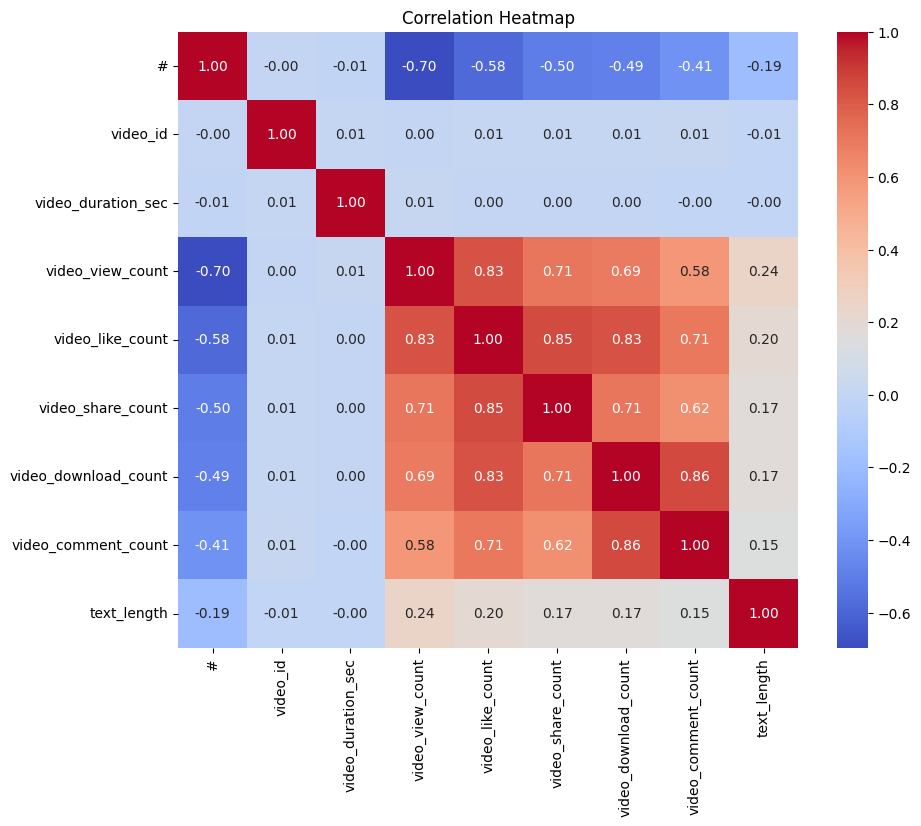

In [ ]:
# Create a heatmap to visualize how correlated variables are
### YOUR CODE HERE ###
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?
* The following numeric variables appear to have fair amounts of correlation with each other:
    * video_view_count
    * video_like_count
    * video_share_count
    * video_download_count
    * video_comment_count

<img src="https://drive.google.com/uc?id=1xa68IrpTXu0KRFO49MEMiLaje8469nsk" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [ ]:
verified_mapping = {"verified": 1.0, "not verified": 0.0}
data_upsampled['verified_status'] = data_upsampled['verified_status'].map(verified_mapping)
data_upsampled['verified_status'] = data_upsampled['verified_status'].astype('float64')
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,0.0,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,0.0,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,0.0,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,0.0,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,0.0,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [ ]:
# Select outcome variable
### YOUR CODE HERE ###
y = data_upsampled[['verified_status']]

In [ ]:
data_upsampled['video_view_count'] = np.log(data_upsampled['video_view_count'])

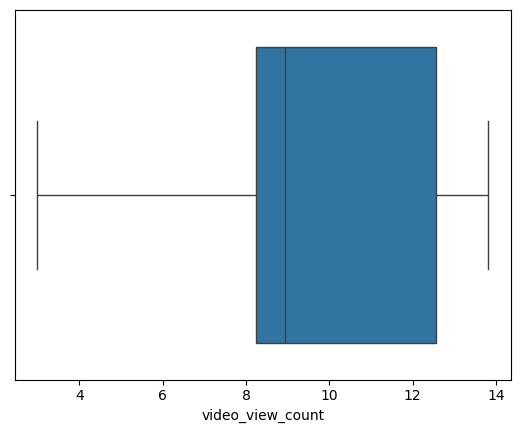

In [ ]:
sns.boxplot(x=data_upsampled['video_view_count'])
plt.show()

Select the features.

In [ ]:
# Select features
### YOUR CODE HERE ###
X = data_upsampled[['video_view_count']]

# Display first few rows of features dataframe
### YOUR CODE HERE ###
X.head()

,video_view_count
0,12.746348
1,11.855642
2,13.712575
3,12.988846
4,10.936085


### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [ ]:
# Split the data into training and testing sets
### YOUR CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Confirm that the dimensions of the training and testing sets are in alignment.

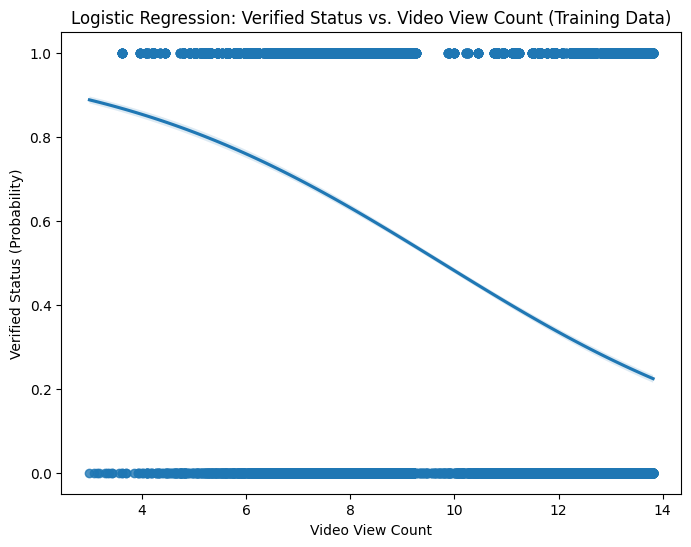

In [ ]:
# Create regplot
plt.figure(figsize=(8, 6))
sns.regplot(x=X_train, y=y_train, data=data, logistic=True)
plt.title('Logistic Regression: Verified Status vs. Video View Count (Training Data)')
plt.xlabel('Video View Count')
plt.ylabel('Verified Status (Probability)')
plt.show()

In [ ]:
# Get shape of each training and testing set
### YOUR CODE HERE ###
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26826, 1) (8942, 1) (26826, 1) (8942, 1)


### **Task 3c. Encode variables**

Check the data types of the features.

In [ ]:
# Check data types
### YOUR CODE HERE ###
X_train.dtypes

,0
video_view_count,float64


In [ ]:
# Get unique values in `claim_status`
### YOUR CODE HERE ###
#X_train['claim_status'].unique()


In [ ]:
# Get unique values in `author_ban_status`
### YOUR CODE HERE ###
#X_train['author_ban_status'].unique()

(As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.)

In [ ]:
# Select the training features that needs to be encoded
### YOUR CODE HERE ###
#X_train_to_encode = X_train[['claim_status', 'author_ban_status']]

# Display first few rows
### YOUR CODE HERE ###
#X_train_to_encode.head()

In [ ]:
# Set up an encoder for one-hot encoding the categorical features
### YOUR CODE HERE ###
#encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')
#encoder = preprocessing.OneHotEncoder(drop='first', sparse=False)

In [ ]:
# Fit and transform the training features using the encoder
### YOUR CODE HERE ###
#X_train_encoded = encoder.fit_transform(X_train_to_encode)

In [ ]:
# Get feature names from encoder
### YOUR CODE HERE ###
#encoder.get_feature_names_out()

In [ ]:
# Display first few rows of encoded training features
### YOUR CODE HERE ###
#X_train_encoded[:5,:]

In [ ]:
# Place encoded training features (which is currently an array) into a dataframe
### YOUR CODE HERE ###
#X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=encoder.get_feature_names_out())

# Display first few rows
### YOUR CODE HERE ###
#X_train_encoded_df.head()

In [ ]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
### YOUR CODE HERE ###
#X_train.drop(columns=['claim_status', 'author_ban_status']).head()

In [ ]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
### YOUR CODE HERE ###
#X_train_final = pd.concat([X_train.drop(columns=['claim_status', 'author_ban_status']).reset_index(drop=True), X_train_encoded_df], axis=1)
# Display first few rows
### YOUR CODE HERE ###
#X_train_final.head()

Check the data type of the outcome variable.

In [ ]:
# Check data type of outcome variable
### YOUR CODE HERE ###
y_train.dtypes

,0
verified_status,float64


In [ ]:
# Get unique values of outcome variable
### YOUR CODE HERE ###
y_train['verified_status'].unique()

array([1., 0.])

(A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.)

In [ ]:
# Set up an encoder for one-hot encoding the categorical outcome variable
### YOUR CODE HERE ###
#encoder_y = preprocessing.OneHotEncoder(handle_unknown='ignore')
#encoder_y = preprocessing.OneHotEncoder(drop='first', sparse=False)

In [ ]:
# EXTRA
y_train.head()

,verified_status
13017,1.0
18612,1.0
15278,1.0
14230,1.0
12024,1.0


In [ ]:
# EXTRA
y_train.tail()

,verified_status
10277,1.0
10432,1.0
14818,1.0
14733,1.0
2799,0.0


In [ ]:
# prompt: Encode the training outcome variable.

# Fit and transform the training outcome variable using the encoder
#encoder_y.fit(y_train)
#y_train_encoded = encoder_y.transform(y_train).toarray()
#y_train_encoded


In [ ]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
### YOUR CODE HERE ###
#encoder_y.fit(y_train.values.reshape(-1, 1))
#y_train_encoded = encoder_y.transform(y_train).toarray()
#y_train_encoded = encoder_y.transform(y_train).ravel()

# Display the encoded training outcome variable
### YOUR CODE HERE ###
#y_train_encoded

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [ ]:
# prompt: Construct a model and fit it to the training set

# Construct a logistic regression model and fit it to the training set
### YOUR CODE HERE ###
#log_reg = LogisticRegression(random_state=0, max_iter=800)
#log_reg.fit(X_train_final, y_train_encoded)


In [ ]:
# Construct a logistic regression model and fit it to the training set
### YOUR CODE HERE ###
log_reg = LogisticRegression(random_state=0, max_iter=800)
log_reg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=800, random_state=0)

<img src="https://drive.google.com/uc?id=1O04Ts47cyQs_UPSPtJxUXGEKsSpteLRL" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [ ]:
# Select the testing features that needs to be encoded
### YOUR CODE HERE ###
#X_test = X_test[['video_view_count']]

# Display first few rows
### YOUR CODE HERE ###
X_test.head()

,video_view_count
19021,7.658228
14908,8.648397
2902,13.016485
5865,13.583343
12086,7.622664


In [ ]:
# Transform the testing features using the encoder
### YOUR CODE HERE ###
#X_test_encoded = encoder.transform(X_test_to_encode).toarray()
#X_test_encoded = encoder.transform(X_test_to_encode)
#display(encoder.get_feature_names_out())

# Display first few rows of encoded testing features
### YOUR CODE HERE ###
#X_test_encoded[:5,:]

In [ ]:
# Place encoded testing features (which is currently an array) into a dataframe
### YOUR CODE HERE ###
#X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=encoder.get_feature_names_out())

# Display first few rows
### YOUR CODE HERE ###
#X_test_encoded_df.head()

In [ ]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
### YOUR CODE HERE ###
#X_test.drop(columns=['claim_status', 'author_ban_status']).head()

In [ ]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
### YOUR CODE HERE ###
#X_test_final = pd.concat([X_test.drop(columns=['claim_status', 'author_ban_status']).reset_index(drop=True), X_test_encoded_df], axis=1)

# Display first few rows
### YOUR CODE HERE ###
#X_test_final.head()

Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [ ]:
# Use the logistic regression model to get predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred = log_reg.predict(X_test)

Display the predictions on the encoded testing set.

In [ ]:
# Display the predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred

array([1., 1., 0., ..., 1., 0., 1.])

Display the true labels of the testing set.

In [ ]:
# Display the true labels of the testing set
### YOUR CODE HERE ###
y_test

,verified_status
19021,1.0
14908,1.0
2902,1.0
5865,0.0
12086,0.0
...,...
15605,0.0
11833,1.0
15655,0.0
3025,1.0


Encode the true labels of the testing set so it can be compared to the predictions.

In [ ]:
# prompt: Encode the testing outcome variable

# Encode the testing outcome variable
#y_test_encoded = encoder_y.transform(y_test).toarray()

# Display the encoded testing outcome variable
#y_test_encoded


In [ ]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
### YOUR CODE HERE ###
#y_test_encoded = encoder_y.transform(y_test).toarray()
#y_test_encoded = encoder_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
#y_test_encoded

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [ ]:
# Get shape of each training and testing set
### YOUR CODE HERE ###
#print(X_train_final.shape, X_test_final.shape, y_train_encoded.shape, y_test_encoded.shape)

### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

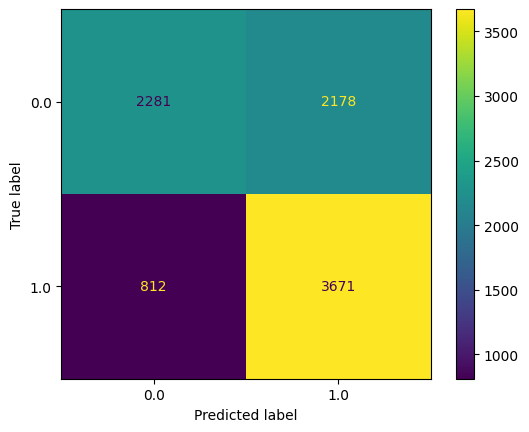

In [ ]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)

# Create display of confusion matrix
### YOUR CODE HERE ###
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)

# Plot confusion matrix
### YOUR CODE HERE ###
disp.plot()

# Display plot
### YOUR CODE HERE ###
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [ ]:
cm[1,1]/(cm[1,1] + cm[1,0])

0.8188712915458398

In [ ]:
# Create a classification report
### YOUR CODE HERE ###
#{"verified": 1.0, "not verified": 0.0}
target_names = ['not verified', 'verified']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

not verified       0.74      0.51      0.60      4459
    verified       0.63      0.82      0.71      4483

    accuracy                           0.67      8942
   macro avg       0.68      0.67      0.66      8942
weighted avg       0.68      0.67      0.66      8942



### **Task 4c. Interpret model coefficients**

In [ ]:
# prompt: Get the feature names from the model and the model coefficients (which represent log-odds ratios). Place into a DataFrame for readability.

# Get the feature names from the model
#feature_names = X_train_final.columns

# Get the coefficients (log-odds ratios) from the model
#coefficients = log_reg.coef_.ravel()

# Create a DataFrame for readability
#coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
#coefficients_df


In [ ]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
### YOUR CODE HERE ###
# Get the feature names from the model
feature_names = X_train.columns

# Get the coefficients (log-odds ratios) from the model
coefficients = log_reg.coef_.ravel()
display(coefficients)
display(log_reg.coef_)

# Create a DataFrame for readability
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df

array([-0.30599827])

array([[-0.30599827]])

,Feature,Coefficient
0,video_view_count,-0.305998


### **Task 4d. Conclusion**

1. What are the key takeaways from this project?

2. What results can be presented from this project?

==> ENTER YOUR RESPONSE TO QUESTIONS 1 AND 2 HERE

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.